## Introduction:  In this project, I will be using graphs and visualization techniques to find out the top taxi companies based on the amount of trips. I am going to find  the top 10 drop off locations based on the average amount of trips. Finally, I am going to be testing the hypothesis that it takes longer on rainy Saturdays to get from Loop to O'Hare International airport. At each step, I am going to be forming conclusions to help the company make informed decisions.

### Import Modules

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import math
from scipy import stats as st
from scipy.stats import ttest_ind
import seaborn as sns

#### Reading the CSV for taxi cab company names and the trip amounts that were given on November 15-16, 2017.

In [2]:
taxi_company_df = pd.read_csv('/datasets/project_sql_result_01.csv')
taxi_company_df.head(10)

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


#### Checking the taxi_company dataframe to make sure that the columns are in the correct data type. 

#### The trips_amount is an integer and the company_name is a string, of Object data type, therefore, our data is in the correct form. 

In [3]:
taxi_company_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


#### Graphing the Taxi Companies compared to the amount of trips given.

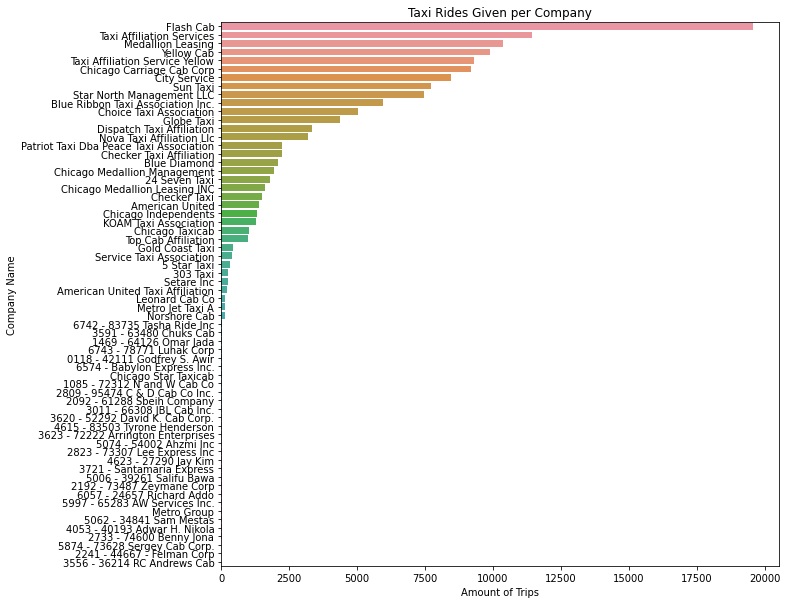

In [4]:
fig, ax = plt.subplots(figsize=(10, 10))

sns.barplot(x=taxi_company_df.trips_amount,y=taxi_company_df.company_name)
ax.set(xlabel='Amount of Trips',
       ylabel ='Company Name',
       title='Taxi Rides Given per Company')

plt.show()

#### Conclusion: Looking at the graph above, I can conclude that the major company being used is Flash Cab. Every other company in the industry is going to have to try and compete with them as the top company. Taxi Affiliation Services, Medallion Leasing, Yellow Cab, Taxi Affiliation Service Yellow, and City Service are the companies that are in the top 6 of rides given. 

#### Reading the csv for the dropoff locations from the taxi cabs and the average duration of the trips in November 2017.

In [5]:
average_trip_dropoff_df = pd.read_csv('/datasets/project_sql_result_04.csv')
average_trip_dropoff_df.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


#### Checking the average_trip_dropoff dataframe to make sure that the columns are in the correct data type. 

#### The dropoff_location_name is a string via an Object data type and the average trips are Float objects. These are both in the correct format.

In [6]:
average_trip_dropoff_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


### Top 10 Neighborhoods by Drop Off Locatoin

In [7]:
top_10_dropoff = average_trip_dropoff_df.head(10)
top_10_dropoff

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


#### The top 10 Neighborhoods by dropoff location are: Loop, River North, Streeterville, West Loop, O'Hare, Lake View, Grant Park, Museum Campus, Gold Coast, and Sheffield & DePaul.

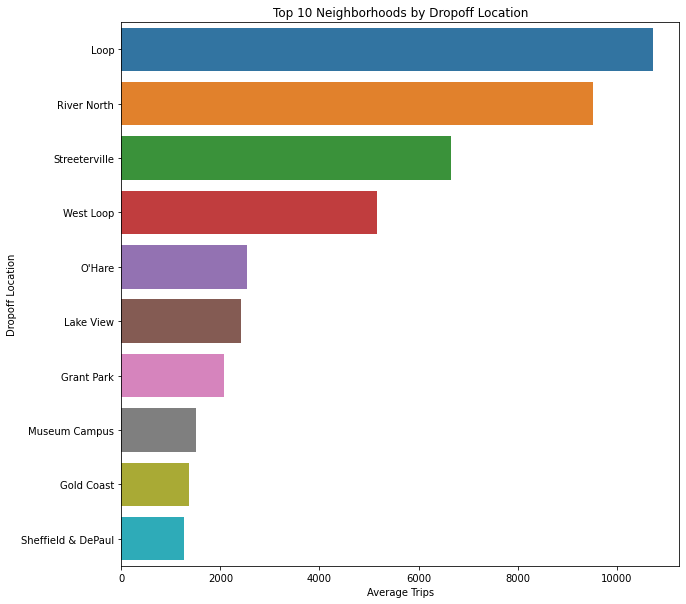

In [35]:
fig, ax = plt.subplots(figsize=(10, 10))

sns.barplot(x=top_10_dropoff.average_trips,y=top_10_dropoff.dropoff_location_name)
ax.set(xlabel='Average Trips',
       ylabel ='Dropoff Location',
       title='Top 10 Neighborhoods by Dropoff Location')

plt.show()

#### Conclusion: If taxi companies want to  maximize their profit then keeping taxis available and ready for Loop, River North, and Streeterville is advisable. 

### Testing the Hypothesis

#### Reading the csv for the start times, weather conditions, and duration of rides from Loop to O'Hare International Airport. 

In [9]:
date_weather_conditions_df = pd.read_csv('/datasets/project_sql_result_07.csv') 
date_weather_conditions_df.head(10)

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
5,2017-11-11 04:00:00,Good,1320.0
6,2017-11-04 16:00:00,Bad,2969.0
7,2017-11-18 11:00:00,Good,2280.0
8,2017-11-11 14:00:00,Good,2460.0
9,2017-11-11 12:00:00,Good,2040.0


#### Checking if the columns are in the correct data type. Looking at the columns, I am going to change start_ts from the Object Data type to the datetime data type.

In [10]:
date_weather_conditions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


#### Converting start_ts to datetime type.

In [11]:
date_weather_conditions_df['start_ts'] = pd.to_datetime(date_weather_conditions_df['start_ts'])

#### Checking that the change went through and I can see that start_ts is now a datetime.

In [12]:
date_weather_conditions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB


#### Creating a graph with all of the Saturdays. It looks like the graph is only of Saturdays but I am doing this step to make 100% sure.

In [20]:
date_weather_conditions_df['days_of_the_week'] = date_weather_conditions_df['start_ts'].dt.dayofweek
saturday_df = date_weather_conditions_df[date_weather_conditions_df['days_of_the_week'] == 5]
saturday_df

,start_ts,weather_conditions,duration_seconds,days_of_the_week
0,2017-11-25 16:00:00,Good,2410.0,5
1,2017-11-25 14:00:00,Good,1920.0,5
2,2017-11-25 12:00:00,Good,1543.0,5
3,2017-11-04 10:00:00,Good,2512.0,5
4,2017-11-11 07:00:00,Good,1440.0,5
...,...,...,...,...
1063,2017-11-25 11:00:00,Good,0.0,5
1064,2017-11-11 10:00:00,Good,1318.0,5
1065,2017-11-11 13:00:00,Good,2100.0,5
1066,2017-11-11 08:00:00,Good,1380.0,5


#### Creating a Good Dataframe/Nice Days

In [36]:
good_df = saturday_df[saturday_df['weather_conditions'] == 'Good']
good_weather_duration = good_df['duration_seconds']

#### Creating a Bad Dataframe/Rainy Days

In [37]:
bad_df = saturday_df[saturday_df['weather_conditions'] == 'Bad']
rain_duration = bad_df['duration_seconds']


#### Creating a hypothesis test

#### Null Hypothesis - The average duration of rides from the Loop to O'Hare International Airport does not change on rainy Saturdays.
#### Alternative Hypothesis - The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays.

#### I created the null hypothesis as it is because the Null Hypothesis assumes there is no difference between the two groups, in this case that is rainy days and nice days. Therefore, the alternative hypothesis would be the opposite of that and suggest that there is a difference between rainy days and nice days. I would initially assume that there is a difference in the duration of the rides because of the rain. 

#### Typically, we use 0.05 to test the hypothesis. If we use 0.10 it makes the area too large then it might incorrectly reject the null hypothesis, whereas, if we use 0.01 and make it too small, we might incorrectly accept it. 

#### I used the duration of time it took to get from Loop to O'Hare Internation from the Good days and compared it with the duration of time it took with the bad days and put it into our statistical test to calculate if we should keep or reject the null hypothesis.

In [39]:
# Test the hypotheses

alpha = 0.05  # critical statistical significance

results = st.ttest_ind(good_weather_duration, rain_duration, equal_var= False)

print('p-value: ', float(results.pvalue))

if results.pvalue < alpha:
    print('We reject the null hypothesis')
else:
    print("We can't reject the null hypothesis") 

p-value:  6.738994326108734e-12
We reject the null hypothesis


#### Conclusion: The result is statistically significant. The ttest that I performed suggests that "The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays" Therefore, we should reject the null hypothesis. 

#### Since we rejected the null hypothesis, taxi companies should expect delays and longer duations of rides from Loop to O'Hare International Airport. As a company, I would suggest that they plan accordingly and even have more drivers staffed on rainy days to make sure that there are taxi's ready when people need to get to the airport.